In [1]:
%load_ext autoreload
%autoreload 2
from NBT import *

In [2]:
# Gene SYMBOL 2 ENSG
Symbol2ENSG, Uniprot2ENSG, ENSP2ENSG, Entrez2ENSG = LoadIDMapping()
ENSG2Symbol = {}
for k,v in Symbol2ENSG.items():
    ENSG2Symbol[v] = k

In [12]:
PrePPI, unmappedUniprot = LoadNetworkPrePPI(Uniprot2ENSG)
subPrePPI = PrePPI.subgraph_edges(PrePPI.es.select(weight_ge=1e6))
print(len(subPrePPI.vs))
print(np.mean(subPrePPI.degree()))

/Users/jiayao/anaconda3/lib/python3.7/site-packages/igraph/__init__.py:2280: RuntimeWarning: A non-numeric, non-string, non-boolean edge attribute was ignored at foreign.c:2648
  return writer(f, *args, **kwds)


9023
11.945915992463704


In [6]:
# Load Tissue Exp Dat
GTExExp = pd.read_csv("../dat/GTEx_SMTS_Gene_Exp.tsv", delimiter="\t", index_col="Name")
print(GTExExp.columns.values)
GTExExp.head(2)

['Description' 'Skin' 'Cervix Uteri' 'Uterus' 'Adipose Tissue' 'Heart'
 'Thyroid' 'Small Intestine' 'Kidney' 'Prostate' 'Liver' 'Pancreas'
 'Spleen' 'Bladder' 'Colon' 'Blood Vessel' 'Lung' 'Esophagus' 'Muscle'
 'Ovary' 'Vagina' 'Brain' 'Blood' 'Testis' 'Fallopian Tube' 'Breast'
 'Salivary Gland' 'Adrenal Gland' 'Pituitary' 'Bone Marrow' 'Nerve'
 'Stomach']


,Description,Skin,Cervix Uteri,Uterus,Adipose Tissue,Heart,Thyroid,Small Intestine,Kidney,Prostate,...,Blood,Testis,Fallopian Tube,Breast,Salivary Gland,Adrenal Gland,Pituitary,Bone Marrow,Nerve,Stomach
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000186092,OR4F5,0.025918,0.030203,0.015057,0.027855,0.053155,0.027711,0.033825,0.045193,0.025381,...,0.012020,0.022574,0.010149,0.027705,0.02373,0.036714,0.018040,NaN,0.023290,0.035101
ENSG00000235249,OR4F29,0.020343,0.007111,0.013783,0.021115,0.035537,0.023421,0.023829,0.023720,0.020852,...,0.012044,0.015739,0.014486,0.022287,0.01979,0.026544,0.015122,NaN,0.022551,0.023630


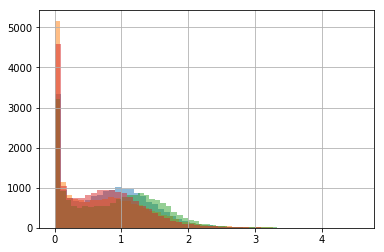

In [9]:
GTExExp["Brain"].hist(bins=50, alpha=.5)
GTExExp["Blood"].hist(bins=50, alpha=.5)
GTExExp["Skin"].hist(bins=50, alpha=.5)
GTExExp["Heart"].hist(bins=50, alpha=.5)

In [33]:
Brain_exp_genes = GTExExp[GTExExp["Brain"]>1.5].index
print(len(Brain_exp_genes))
Brain_subPPI = subPrePPI.subgraph(subPrePPI.vs.select(ENSGID_in=Brain_exp_genes))
print(len(Brain_subPPI.vs))

2335
1642


In [24]:
noBrain_exp_genes = GTExExp[GTExExp["Brain"]<0.4].index
print(len(noBrain_exp_genes))
non_Brain_subPPI = subPrePPI.subgraph(subPrePPI.vs.select(ENSGID_in=noBrain_exp_genes))
print(len(non_Brain_subPPI.vs))

5932
1808


In [14]:
Blood_exp_genes = GTExExp[GTExExp["Blood"]>0.4].index
print(len(Blood_exp_genes))
Blood_subPPI = subPrePPI.subgraph(subPrePPI.vs.select(ENSGID_in=Blood_exp_genes))
print(len(Blood_subPPI.vs))

10129
6122


In [15]:
Skin_exp_genes = GTExExp[GTExExp["Skin"]>0.4].index
print(len(Skin_exp_genes))
Skin_subPPI = subPrePPI.subgraph(subPrePPI.vs.select(ENSGID_in=Skin_exp_genes))
print(len(Skin_subPPI.vs))

12585
7135


In [16]:
Heart_exp_genes = GTExExp[GTExExp["Heart"]>0.4].index
print(len(Heart_exp_genes))
Heart_subPPI = subPrePPI.subgraph(subPrePPI.vs.select(ENSGID_in=Heart_exp_genes))
print(len(Heart_subPPI.vs))

10943
6489


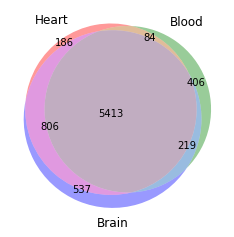

In [23]:
from matplotlib_venn import venn3, venn3_circles
venn3([set(Heart_subPPI.vs["ENSGID"]), 
      set(Blood_subPPI.vs["ENSGID"]), 
      set(Brain_subPPI.vs["ENSGID"])], 
      set_labels=("Heart", "Blood", "Brain"))

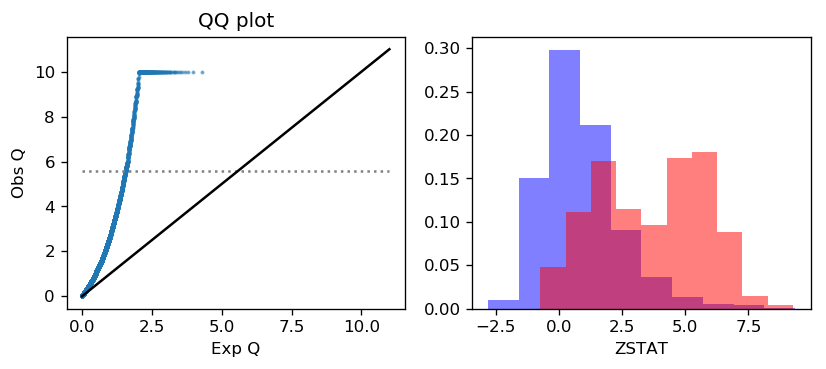

In [26]:
SCZ_high_conf_gene = pd.read_csv("../dat/network/psychencode/INT-17_SCZ_High_Confidence_Gene_List.csv")
SCZ_Core = SCZ_high_conf_gene["sczgenenames"].values
GeneTest = ProcessLoadGeneTestAndPlot("../dat/GWAS/GeneTest/scz.genetest.tsv", SCZ_Core)

0	mean=3.647(+-0.131)	N=270
1	mean=1.235(+-0.118)	N=151
2	mean=1.018(+-0.054)	N=819
3	mean=1.002(+-0.092)	N=303
4	mean=1.088(+-0.317)	N=28
5	mean=3.264(+-0.333)	N=3


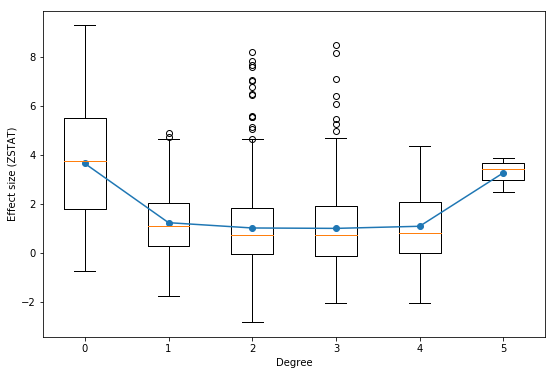

0	1	2.107e-26
0	2	1.087e-60
0	3	3.382e-43
0	4	2.238e-08
0	5	3.662e-01
1	2	1.115e-02
1	3	1.214e-02
1	4	2.804e-01
1	5	1.186e-02
2	3	3.171e-01
2	4	3.715e-01
2	5	7.834e-03
3	4	3.463e-01
3	5	7.490e-03
4	5	2.436e-02


In [34]:
SCZdegreesEff = MapGenes2NetWork(GeneTest, Brain_subPPI, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff, N=6)
PairwiseTest(SCZdegreesEff, N=6)

0	mean=3.647(+-0.131)	N=270
1	mean=1.427(+-0.333)	N=59
2	mean=0.802(+-0.118)	N=174
3	mean=0.718(+-0.108)	N=152
4	mean=0.684(+-0.153)	N=79
5	mean=0.401(+-0.272)	N=41


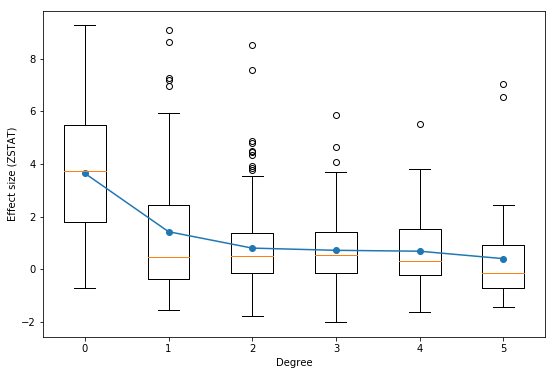

0	1	4.167e-11
0	2	1.643e-37
0	3	1.767e-36
0	4	7.522e-24
0	5	7.172e-16
1	2	2.610e-01
1	3	2.436e-01
1	4	1.763e-01
1	5	2.141e-02
2	3	4.875e-01
2	4	3.400e-01
2	5	1.126e-02
3	4	3.273e-01
3	5	9.581e-03
4	5	3.392e-02


In [29]:
SCZdegreesEff = MapGenes2NetWork(GeneTest, non_Brain_subPPI, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff, N=6)
PairwiseTest(SCZdegreesEff, N=6)

0	mean=3.647(+-0.131)	N=270
1	mean=1.447(+-0.296)	N=19
2	mean=0.944(+-0.129)	N=145
3	mean=1.346(+-0.176)	N=96
4	mean=1.323(+-0.471)	N=17
5	mean=2.092(+-0.000)	N=1


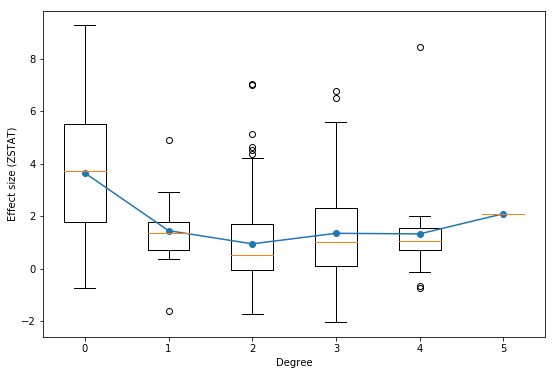

In [35]:
Brain_exp_genes = GTExExp[GTExExp["Brain"]>2].index
Brain_subPPI = subPrePPI.subgraph(subPrePPI.vs.select(ENSGID_in=Brain_exp_genes))
SCZdegreesEff = MapGenes2NetWork(GeneTest, Brain_subPPI, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff, N=6)

0	mean=3.647(+-0.131)	N=270
1	mean=1.235(+-0.118)	N=151
2	mean=1.018(+-0.054)	N=819
3	mean=1.002(+-0.092)	N=303
4	mean=1.088(+-0.317)	N=28
5	mean=3.264(+-0.333)	N=3


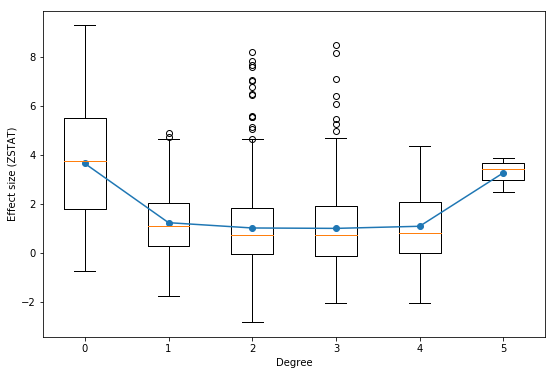

In [36]:
Brain_exp_genes = GTExExp[GTExExp["Brain"]>1.5].index
Brain_subPPI = subPrePPI.subgraph(subPrePPI.vs.select(ENSGID_in=Brain_exp_genes))
SCZdegreesEff = MapGenes2NetWork(GeneTest, Brain_subPPI, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff, N=6)

0	mean=3.647(+-0.131)	N=270
1	mean=0.975(+-0.054)	N=785
2	mean=1.036(+-0.032)	N=2393
3	mean=1.049(+-0.067)	N=497
4	mean=0.849(+-0.154)	N=66
5	mean=0.023(+-0.330)	N=5


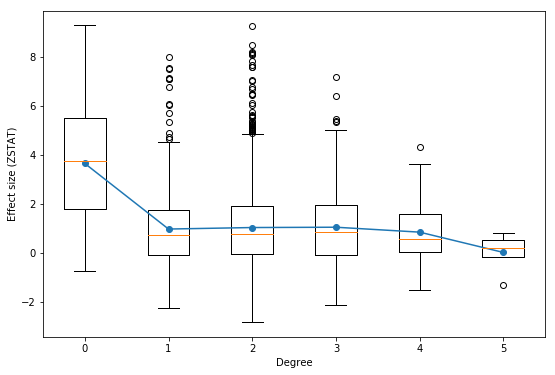

In [37]:
Brain_exp_genes = GTExExp[GTExExp["Brain"]>1].index
Brain_subPPI = subPrePPI.subgraph(subPrePPI.vs.select(ENSGID_in=Brain_exp_genes))
SCZdegreesEff = MapGenes2NetWork(GeneTest, Brain_subPPI, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff, N=6)

0	mean=3.647(+-0.131)	N=270
1	mean=0.999(+-0.046)	N=1093
2	mean=0.995(+-0.025)	N=3917
3	mean=0.994(+-0.055)	N=805
4	mean=0.893(+-0.120)	N=116
5	mean=0.783(+-0.446)	N=12


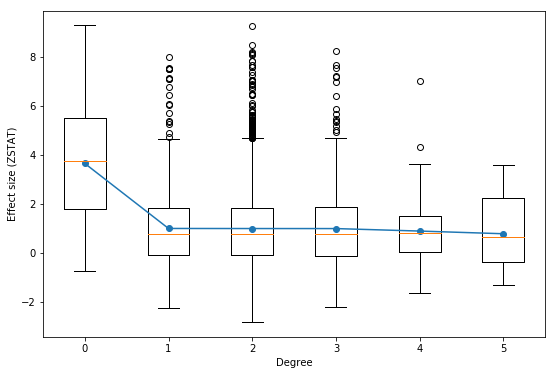

In [38]:
Brain_exp_genes = GTExExp[GTExExp["Brain"]>0.5].index
Brain_subPPI = subPrePPI.subgraph(subPrePPI.vs.select(ENSGID_in=Brain_exp_genes))
SCZdegreesEff = MapGenes2NetWork(GeneTest, Brain_subPPI, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff, N=6)

0	mean=3.647(+-0.131)	N=270
1	mean=1.004(+-0.044)	N=1178
2	mean=0.971(+-0.023)	N=4478
3	mean=0.971(+-0.049)	N=989
4	mean=1.008(+-0.122)	N=148
5	mean=0.581(+-0.332)	N=19


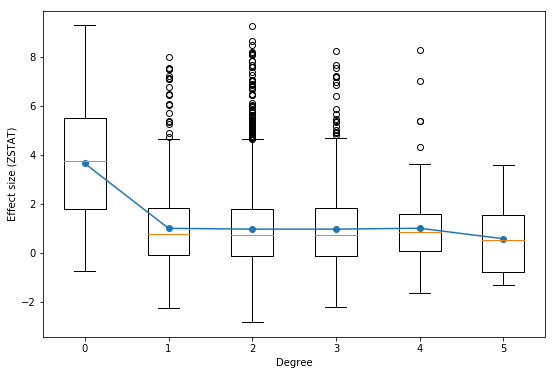

In [39]:
Brain_exp_genes = GTExExp[GTExExp["Brain"]>0.2].index
Brain_subPPI = subPrePPI.subgraph(subPrePPI.vs.select(ENSGID_in=Brain_exp_genes))
SCZdegreesEff = MapGenes2NetWork(GeneTest, Brain_subPPI, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff, N=6)

0	mean=3.647(+-0.131)	N=270
1	mean=1.005(+-0.044)	N=1297
2	mean=0.925(+-0.021)	N=5091
3	mean=0.874(+-0.043)	N=1289
4	mean=0.738(+-0.091)	N=280
5	mean=0.319(+-0.206)	N=35


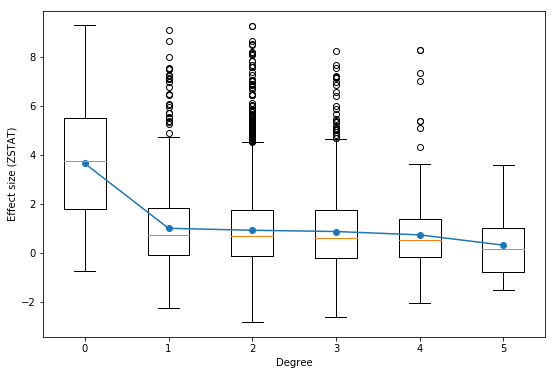

In [40]:
Brain_exp_genes = GTExExp[GTExExp["Brain"]>0].index
Brain_subPPI = subPrePPI.subgraph(subPrePPI.vs.select(ENSGID_in=Brain_exp_genes))
SCZdegreesEff = MapGenes2NetWork(GeneTest, Brain_subPPI, SCZ_Core, Symbol2ENSG, ENSG2Symbol)
PlotDegreeDecay(SCZdegreesEff, N=6)